In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/2020-10-09.csv')
df.head()

,tweet_id,text,created_at,timestamp_ms,user_id,user_name,user_location,geo,coordinates,place_full_name,place_country,retweeted_status_id
0,1314451566439661568,Guess I ain't swingin my dick good enough caz ...,2020-10-09 06:24:09,1602224649425,1006204366100025344,Ꭷʀɪɢɪᑎal ᖇᴜᴅᴇᗷᴏʏ 💫♿,NaN,NaN,NaN,"Brooklyn, NY",United States,NaN
1,1314451581153222657,diamond rottweillerrrrr,2020-10-09 06:24:12,1602224652933,127948493,Pretty much.,"New York, New York",NaN,NaN,"Manhattan, NY",United States,NaN
2,1314451587536883713,阿富汗美军每年耗费数十亿美金，屁用没有，这才是撤军原因。,2020-10-09 06:24:14,1602224654455,1248042322287157248,🔥討虜軍義工🔥,黄俄帝国,NaN,NaN,NaN,NaN,NaN
3,1314451591899029517,RT @jfradioshow: #Friday Joe Morrissey 7:35 AM...,2020-10-09 06:24:15,1602224655495,1118945855594225666,Servant Of The Lord,NaN,NaN,NaN,NaN,NaN,1314353725184585735
4,1314451601537536001,RT @zoomailplugged: 当地时间10月8日，据统计，美国于7日至少报告了52...,2020-10-09 06:24:17,1602224657793,1314128986230976512,Fdhbvgjku,NaN,NaN,NaN,NaN,NaN,1314377865581002753


In [26]:
pd.options.display.max_colwidth = 200
text = df['text']
text[16]

'RT @Laurie_Garrett: "Trump’s antibody treatment was tested using cells originally derived from an #abortion.\nThe #Trump administration has…'

## Preliminary Sentimental Analysis

In [20]:
!pip install nltk

You should consider upgrading via the 'c:\users\choon\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [25]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(text[16])
print(text[16])
print(tokens)

RT @Laurie_Garrett: "Trump’s antibody treatment was tested using cells originally derived from an #abortion.
The #Trump administration has…
['RT', '@', 'Laurie_Garrett', ':', '``', 'Trump', '’', 's', 'antibody', 'treatment', 'was', 'tested', 'using', 'cells', 'originally', 'derived', 'from', 'an', '#', 'abortion', '.', 'The', '#', 'Trump', 'administration', 'has…']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\choon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [69]:
trump_text = []
biden_text = []
for sentence in text:
    if('#Trump' in sentence):
        #stripping the common stop letters
        trump_text.append(sentence)
    else: 
        biden_text.append(sentence)

biden_text = pd.DataFrame(biden_text,columns=['text'])
trump_text = pd.DataFrame(trump_text,columns=['text'])

In [81]:
processed = []

for i in range(len(trump_text)):
    processed.append(process_tweets(trump_text['text'][i]))
trump_text['processed_tweets'] = processed
trump_text.head()

,text,polarity_scores,processed_tweets
0,"RT @The_NewArab: #US President Donald #Trump has imposed sweeping sanctions on Iranian banks, seeking to deal a crippling blow to #Iran’s e…","{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'compound': -0.0772}",RT US President Donald Trump imposed sweeping sanctions Iranian banks seeking deal crippling blow Iran ’ e…
1,RT @news_ntd: Trump campaign manager called for the town hall meeting #debate between #Trump and #Biden to take place on Oct. 22 instead of…,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",RT Trump campaign manager called town hall meeting debate Trump Biden take place Oct 22 instead of…
2,"Was voting for Biden, but now Trump https://t.co/cB9Hm1h2ZA via @FacebookWatch #biden #Trump","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Was voting Biden Trump httpstcocB9Hm1h2ZA via biden Trump
3,"Trump meğer kobay olmuş! Dr. Anthony Fauci, ABD Başkanı #Trump 'ın sağlık durumunun, ilaç şirketi Regeneron tarafın… https://t.co/nBCXm1Ehoy","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Trump meğer kobay olmuş Dr Anthony Fauci ABD Başkanı Trump ın sağlık durumunun ilaç şirketi Regeneron tarafın… httpstconBCXm1Ehoy
4,"RT @Laurie_Garrett: ""Trump’s antibody treatment was tested using cells originally derived from an #abortion.The #Trump administration has…","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",RT Trump ’ antibody treatment tested using cells originally derived abortionThe Trump administration has…


In [96]:
processed = []

for i in range(len(biden_text)):
    processed.append(process_tweets(biden_text['text'][i]))
biden_text['processed_tweets'] = processed
biden_text.head()

,text,processed_tweets
0,Guess I ain't swingin my dick good enough caz ion kno y my tickets ain't gettin bought,Guess I aint swingin dick good enough caz ion kno tickets aint gettin bought
1,diamond rottweillerrrrr,diamond rottweillerrrrr
2,阿富汗美军每年耗费数十亿美金，屁用没有，这才是撤军原因。,阿富汗美军每年耗费数十亿美金，屁用没有，这才是撤军原因。
3,"RT @jfradioshow: #Friday Joe Morrissey 7:35 AM, @DavidMMcintosh 8:05 AM, Steve Bannon @CitizensAR 8:35 AM, @CortesSteve 9:05 AM, Charlie Wi…",RT Friday Joe Morrissey 735 AM 805 AM Steve Bannon 835 AM 905 AM Charlie Wi…
4,RT @zoomailplugged: 当地时间10月8日，据统计，美国于7日至少报告了52635例新增确诊病例和994例新增死亡病例。过去一周，美国每天平均新增45660例确诊病例，比两周前的平均水平增加了9％。截至8日上午，美国已有7582300人被感染病毒，至少有2117…,RT 当地时间10月8日，据统计，美国于7日至少报告了52635例新增确诊病例和994例新增死亡病例。过去一周，美国每天平均新增45660例确诊病例，比两周前的平均水平增加了9％。截至8日上午，美国已有7582300人被感染病毒，至少有2117…


In [67]:
trump_text['text'][10]

'Donald #Trump has finished treatment for COVID-19 and may return to public appearances, says his doctor.  Biden pro… https://t.co/51yZdWvxtX'

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
#nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()
trump_score = 0
biden_score = 0

#print(trump_text[30])
#print(sa.polarity_scores(trump_text[30])) #inaccurate
scores=[]
for i in range(len(trump_text)):
    scores.append(sa.polarity_scores(trump_text['text'][i]))
trump_text['polarity_scores'] = scores
trump_text.sample(20)


,text,polarity_scores
11413,"RT @DebraMessing: Hey AMERICA! The drug ( not yet available in the US) that was given to #Trump ~Remdesivir ~is $5020/vial, insurance pays…","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
13764,"RT @JanJekielek: Really enjoying reading @DanielAllott's upcoming book, ""On the Road in #Trump's America.""It begins: ""An essential part o…","{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.5709}"
11121,RT @ScottAdamsSays: #Trump Issues Threat to #Iran “If You Fuck Around With Us....” (w/#RushL... https://t.co/E9ZH2RthLh via @YouTube,"{'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.7845}"
10065,Re Tweet when you see it #Trump #FLOTUS https://t.co/LVB3XQhjUY,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3182,If Trump is re-elected Canada might build a freakin’ wall. And the border is damn sure stayin’ closed. 🤦🏼‍♀️ 🇨🇦 #Trump#Canada#TrueNorth,"{'neg': 0.117, 'neu': 0.783, 'pos': 0.1, 'compound': -0.1027}"
1254,RT @SaraCarterDC: #Trump to hold virtual #MAGA rally on #RushLimbaugh's Friday showhttps://t.co/b4N6DpRuUk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
14935,@maggmountains Are there enough smart people who appreciate what #Trump has been trying to achieve for the #US and #worlwide? 🤔,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.6597}"
18296,"#THIS. This is what #Trump is all about. Even if you believe the #dems nonsense about Trump, see this #truth,… https://t.co/CjGQMhZLqK","{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'compound': -0.4019}"
12988,"RT @DBonyuet: El gran contraste de #Trump fue precisamente Obama, quien ejerció la peor (si no la más devastadora) política exteriorSu leg…","{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'compound': -0.296}"
2956,"#Trump is a beast, he's what, about a week into his #COVID19 diagnosis?? He sounds like he's a 45 year old hungry p… https://t.co/87oH63K4ts","{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.4329}"


### Comments about Vader

Result from Vader doesnt look very convincing and promising

nltk.sentiment.util.demo_liu_hu_lexicon(sentence, plot=False)

Basic example of sentiment classification using Liu and Hu opinion lexicon. This function simply counts the number of positive, negative and neutral words in the sentence and classifies it depending on which polarity is more represented. Words that do not appear in the lexicon are considered as neutral.

In [80]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
def process_tweets(text):
    
    #stripping the common stop letters
    text = re.sub(r'\@\w+|\#|\n|]b','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_words)
        

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
#nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()
trump_score = 0
biden_score = 0

#print(trump_text[30])
#print(sa.polarity_scores(trump_text[30])) #inaccurate
scores=[]
for i in range(len(trump_text)):
    scores.append(sa.polarity_scores(trump_text['processed_tweets'][i]))
trump_text['processed_polarity_scores'] = scores
trump_text.sample(20)


,text,polarity_scores,processed_tweets,processed_polarity_scores
16674,"RT @SholaMos1: #Trump calls #KamalaHarris a Monster. He's calling every assertive, intelligent, accomplished woman of colour a Monster. #Vo…","{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.7096}",RT Trump calls KamalaHarris Monster Hes calling every assertive intelligent accomplished woman colour Monster Vo…,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.7096}"
10653,RT @DebraMessing: “...little tiny fish.”#25AmendmentNow #Trump https://t.co/tDQ18Z1L7T,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",RT “ little tiny fish ” 25AmendmentNow Trump httpstcotDQ18Z1L7T,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
16507,"RT @mog7546: #Trump's 'Secret Loan' VIOLATED FEDERAL LAWHe secretly loaned himself $30 million in 2016, according to a nonprofit governme…","{'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.6289}",RT Trumps Secret Loan VIOLATED FEDERAL LAWHe secretly loaned 30 million 2016 according nonprofit governme…,"{'neg': 0.228, 'neu': 0.772, 'pos': 0.0, 'compound': -0.6289}"
9798,RT @michaeljohns: Enthusiasm for @realDonaldTrump in my native #Pennsylvania is enormous. #Trump signs and flags are everywhere. @Dickins…,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}",RT Enthusiasm native Pennsylvania enormous Trump signs flags everywhere …,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}"
16520,RT @Mickeyinblack: Funny article. #China has above 4 times more 5G base stations and 30 times more 5G users than #US. #Trump administration…,"{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.4404}",RT Funny article China 4 times 5G base stations 30 times 5G users US Trump administration…,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}"
4666,#TrumpIsPatientZero,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",TrumpIsPatientZero,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3593,@BlobRai3 #blobricambio #Trump #bullone...... https://t.co/tjlUi4w3vK,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",blobricambio Trump bullone httpstcotjlUi4w3vK,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
7103,RT @BitarReal: Preview of what could happen in November if . . . . . #TrumpIsALoser #TrumpIsNotWell #TrumpIsACoward #Trump https://t.c…,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",RT Preview could happen November TrumpIsALoser TrumpIsNotWell TrumpIsACoward Trump httpstc…,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
9382,"RT @SaraCarterDC: 'If you f--- around with us': Pres. #Trump puts #Iran on noticeGood, hold them accountable for their terrorism and huma…","{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.6808}",RT If f around us Pres Trump puts Iran noticeGood hold accountable terrorism huma…,"{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.6808}"
12310,"RT @DebraMessing: #Trump : ““I would like to see a bigger stimulus package frankly than either the Democrats or Republicans are offering,”…","{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.3612}",RT Trump “ “ I would like see bigger stimulus package frankly either Democrats Republicans offering ” …,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}"


In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
#nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()
biden_score = 0
biden_score = 0

#print(biden_text[30])
#print(sa.polarity_scores(biden_text[30])) #inaccurate
scores=[]
for i in range(len(biden_text)):
    scores.append(sa.polarity_scores(biden_text['processed_tweets'][i]))
biden_text['processed_polarity_scores'] = scores
biden_text.sample(20)


,text,processed_tweets,processed_polarity_scores
36558,Words to live by...\n\nThat 2pc with a soda is coming for ya! \n\n@ECWA1967 November 7th! \nHold The Fries You Nugget!🤣,Words live byThat 2pc soda coming ya November 7th Hold The Fries You Nugget🤣,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
9612,@timkaine The definitive Trump book! “The author’s biting use of humor is like the proverbial ‘spoonful of sugar’ t… https://t.co/QxFAZWTDN0,The definitive Trump book “ The author ’ biting use humor like proverbial ‘ spoonful sugar ’ t… httpstcoQxFAZWTDN0,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.5574}"
29821,@DamarisMone @TheChrisPBaycon @AreYouvIn @ssssnipe @SquarePegDem @SonsofX @NYCSchools @DOEChancellor @NYCMayor @UFT… https://t.co/TLqZQeiJtT,… httpstcoTLqZQeiJtT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
24535,"Starting this epic weekend with @originaldobo out in the pine barrens, unreal scenery out here @ Whitesbog, New Jer… https://t.co/nxqkjQV90M",Starting epic weekend pine barrens unreal scenery Whitesbog New Jer… httpstconxqkjQV90M,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
21467,RT @USANewsAgency: Media source was at near empty Press Room of White House when Dr. Sean Conley came in to drop off papers. Overheard WH s…,RT Media source near empty Press Room White House Dr Sean Conley came drop papers Overheard WH s…,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.4404}"
455,RT @pickupapainting: Just want to put this out there \nI got lots of shit for painting #trump from #biden supporters \nBut mostly nice commen…,RT Just want put I got lots shit painting trump biden supporters But mostly nice commen…,"{'neg': 0.167, 'neu': 0.509, 'pos': 0.324, 'compound': 0.34}"
7725,@BenLehwald I love this energy ✨,I love energy ✨,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.743}"
40302,"RT @KIMAGA4EVER: This is #Pelosi thinking we aren’t smart enough to know, if #Biden wins, it’s Biden she wants removed with the 25th so #Ka…",RT This Pelosi thinking ’ smart enough know Biden wins ’ Biden wants removed 25th Ka…,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.7506}"
28431,RT @KillAuDeepState: Vote for #Biden and you will get #Harris (not that Joe has any chance to win).\n\nIt can’t be easy if you’re crazy enoug…,RT Vote Biden get Harris Joe chance winIt ’ easy ’ crazy enoug…,"{'neg': 0.157, 'neu': 0.523, 'pos': 0.32, 'compound': 0.3612}"
16149,LMFAOOO yo niggas are ruthless bro,LMFAOOO yo niggas ruthless bro,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}"


## Generating word cloud

seeing if we can get anything from the word cloud

In [85]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\choon\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [86]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [93]:
text = " ".join(text for text in trump_text['processed_tweets'])
len(text)

1663058

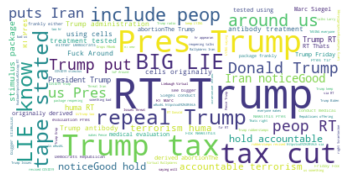

In [94]:
trump_text['processed_tweets']
eg
wordcloud= WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

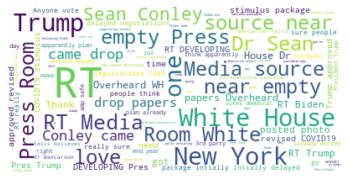

In [97]:
text = " ".join(text for text in biden_text['processed_tweets'])
len(text)
wordcloud= WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()